**KELOMPOK FOLKLORE :**

 1. Aquina Tsabita (24083010006)
 2. Diah Anggraini (24083010051)
 3. Gendis Poerbodani (24083010077)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("ksa_solar_dataset_2024_detailed.csv", encoding='latin1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Understanding**

In [ ]:
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Jumlah baris: 10980, Jumlah kolom: 13


In [ ]:
df.head()

,Date,City,Latitude,Longitude,Temperature (°C),Weather,Panel Type,Mount Type,Tilt (°),Panel Efficiency (%),Solar Irradiance (kWh/m²/day),Output Power (W),Estimated Daily Output (kWh)
0,1/1/2024,Riyadh,24.7136,46.6753,18,few clouds,Monocrystalline,Rooftop,25,22,5.39,1.90,21.06
1,1/1/2024,Riyadh,24.7136,46.6753,18,few clouds,Polycrystalline,Rooftop,25,18,5.39,1.55,21.06
2,1/1/2024,Riyadh,24.7136,46.6753,18,few clouds,Thin-Film,Rooftop,25,12,5.39,1.04,21.06
3,1/1/2024,Riyadh,24.7136,46.6753,18,few clouds,Monocrystalline,Ground,15,22,4.97,1.75,19.47
4,1/1/2024,Riyadh,24.7136,46.6753,18,few clouds,Polycrystalline,Ground,15,18,4.97,1.43,19.47


Dataset ini mensimulasikan produksi energi surya per jam selama tahun 2024 di 5 kota besar Arab Saudi, yaitu Riyadh, Jeddah, Mecca, Medina, dan Dammam. Dataset menggabungkan data cuaca realistis, faktor geografis, efisiensi panel, dan orientasi kemiringan untuk memberikan gambaran mengenai performa sistem solar panel.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           10980 non-null  object 
 1   City                           10980 non-null  object 
 2   Latitude                       10980 non-null  float64
 3   Longitude                      10980 non-null  float64
 4   Temperature (°C)               10980 non-null  int64  
 5   Weather                        10980 non-null  object 
 6   Panel Type                     10980 non-null  object 
 7   Mount Type                     10980 non-null  object 
 8   Tilt (°)                       10980 non-null  int64  
 9   Panel Efficiency (%)           10980 non-null  int64  
 10  Solar Irradiance (kWh/m²/day)  10980 non-null  float64
 11  Output Power (W)               10980 non-null  float64
 12  Estimated Daily Output (kWh)   10980 non-null 

Dataset berjumalh 10980 dengan total kolom 13. Variabel yang digunakan antara lain: Date (Tanggal), City (5 Kota di Saudi Arabia), Latitude (Garis Lintang), Longitude (Garis Bujur), Temperature (Suhu), Weather (Kondisi Cuaca), Panel Type (Tipe Panel Surya), Mount Type (Konfigurasi Penempatan Panel Surya), Tilt (Kemiringan), Panel Efficiency (Tingkat Efisiensi Panel Surya), Solar Irradience (Radiasi Matahari), Output Power (Energi yang dikeluarkan), Estimated Daily Output (Estimasi Pengeluaran per Hari).

In [ ]:
print("\n Statistik deskriptif:")
display(df.describe())


 Statistik deskriptif:


,Latitude,Longitude,Temperature (°C),Tilt (°),Panel Efficiency (%),Solar Irradiance (kWh/m²/day),Output Power (W),Estimated Daily Output (kWh)
count,10980.000000,10980.000000,10980.000000,10980.000000,10980.000000,10980.000000,10980.000000,10980.000000
mean,23.706780,43.076740,30.778689,20.000000,17.333333,6.509765,1.805381,24.042257
std,1.967445,4.469425,8.592400,5.000228,4.109796,0.740830,0.477080,2.323917
min,21.389100,39.192500,18.000000,15.000000,12.000000,4.370000,0.840000,17.150000
25%,21.485800,39.569200,25.000000,15.000000,12.000000,6.077500,1.360000,22.860000
50%,24.524700,39.857900,32.000000,20.000000,18.000000,6.730000,1.880000,24.570000
75%,24.713600,46.675300,40.000000,25.000000,22.000000,7.090000,2.160000,25.760000
max,26.420700,50.088800,43.000000,25.000000,22.000000,7.590000,2.670000,27.920000


In [ ]:
print("Kolom yang tersedia:")
print(df.columns.tolist())

Kolom yang tersedia:
['Date', 'City', 'Latitude', 'Longitude', 'Temperature (°C)', 'Weather', 'Panel Type', 'Mount Type', 'Tilt (°)', 'Panel Efficiency (%)', 'Solar Irradiance (kWh/m²/day)', 'Output Power (W)', 'Estimated Daily Output (kWh)']


In [ ]:
cat_cols = ['City','Weather','Panel Type','Mount Type']
for col in cat_cols:
    print(f"\n Nilai unik kolom {col}:")
    print(df[col].unique())


 Nilai unik kolom City:
['Riyadh' 'Jeddah' 'Mecca' 'Medina' 'Dammam']

 Nilai unik kolom Weather:
['few clouds' 'scattered clouds' 'sunny' 'clear sky']

 Nilai unik kolom Panel Type:
['Monocrystalline' 'Polycrystalline' 'Thin-Film']

 Nilai unik kolom Mount Type:
['Rooftop' 'Ground']


In [ ]:
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


Jumlah missing value per kolom:
Date                             0
City                             0
Latitude                         0
Longitude                        0
Temperature (°C)                 0
Weather                          0
Panel Type                       0
Mount Type                       0
Tilt (°)                         0
Panel Efficiency (%)             0
Solar Irradiance (kWh/m²/day)    0
Output Power (W)                 0
Estimated Daily Output (kWh)     0
dtype: int64


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\n Jumlah data duplikat: {duplicate_count}")


 Jumlah data duplikat: 0


Tidak terdeteksi nilai kosong maupun nilai duplikat.

# **Data Cleaning**

In [ ]:
df.columns = df.columns.str.strip().str.replace('\xa0', '', regex=True)

print(df.columns.tolist())

['Date', 'City', 'Latitude', 'Longitude', 'Temperature (°C)', 'Weather', 'Panel Type', 'Mount Type', 'Tilt (°)', 'Panel Efficiency (%)', 'Solar Irradiance (kWh/m²/day)', 'Output Power (W)', 'Estimated Daily Output (kWh)']


In [ ]:
num_cols = [
    'Latitude', 'Longitude', 'Temperature (°C)', 'Tilt (°)',
    'Panel Efficiency (%)', 'Solar Irradiance (kWh/m²/day)',
    'Output Power (W)', 'Estimated Daily Output (kWh)'
]

for col in num_cols:
    # Cek apakah ada nilai negatif
    negative_mask = df[col] < 0
    if negative_mask.any():
        count_neg = negative_mask.sum()
        indices = df.index[negative_mask].tolist()
        print(f"\n⚠️  Kolom: {col}")
        print(f"   Jumlah nilai negatif: {count_neg}")
        print(f"   Indeks baris yang bermasalah: {indices[:10]}{'...' if len(indices) > 10 else ''}")
    else:
        print(f"Tidak ada nilai negatif pada kolom {col}")


Tidak ada nilai negatif pada kolom Latitude
Tidak ada nilai negatif pada kolom Longitude
Tidak ada nilai negatif pada kolom Temperature (°C)
Tidak ada nilai negatif pada kolom Tilt (°)
Tidak ada nilai negatif pada kolom Panel Efficiency (%)
Tidak ada nilai negatif pada kolom Solar Irradiance (kWh/m²/day)
Tidak ada nilai negatif pada kolom Output Power (W)
Tidak ada nilai negatif pada kolom Estimated Daily Output (kWh)


Tidak ada

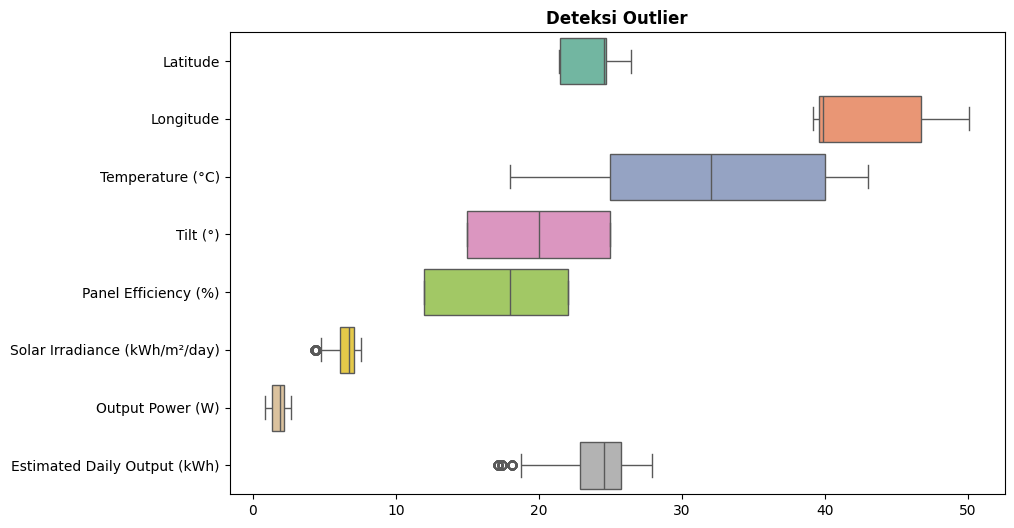


=== Latitude ===
Jumlah outlier: 0
Rentang normal: [16.64, 29.56]

=== Longitude ===
Jumlah outlier: 0
Rentang normal: [28.91, 57.33]

=== Temperature (°C) ===
Jumlah outlier: 0
Rentang normal: [2.50, 62.50]

=== Tilt (°) ===
Jumlah outlier: 0
Rentang normal: [0.00, 40.00]

=== Panel Efficiency (%) ===
Jumlah outlier: 0
Rentang normal: [-3.00, 37.00]

=== Solar Irradiance (kWh/m²/day) ===
Jumlah outlier: 186
Rentang normal: [4.56, 8.61]

=== Output Power (W) ===
Jumlah outlier: 0
Rentang normal: [0.16, 3.36]

=== Estimated Daily Output (kWh) ===
Jumlah outlier: 276
Rentang normal: [18.51, 30.11]


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols], orient='h', palette='Set2')
plt.title('Deteksi Outlier', fontsize=12, fontweight='bold')
plt.show()

def detect_outliers_iqr(df, columns):
    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # deteksi outlier
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices[col] = outliers.index.tolist()

        print(f"\n=== {col} ===")
        print(f"Jumlah outlier: {len(outliers)}")
        print(f"Rentang normal: [{lower_bound:.2f}, {upper_bound:.2f}]")

    return outlier_indices

num_cols = [
    'Latitude', 'Longitude', 'Temperature (°C)', 'Tilt (°)',
    'Panel Efficiency (%)', 'Solar Irradiance (kWh/m²/day)',
    'Output Power (W)', 'Estimated Daily Output (kWh)'
]

outliers_iqr = detect_outliers_iqr(df, num_cols)

Berdasarkan hasil pemerikasaan tidak ditemukan nilai negatif pada seluruh variabel numerik. Terdapat outlier pada variabel Solar Irradiance (186) dan Estimated Daily Output (276). Outlier yang terdeteksi masih dalam batas wajar, sehingga tidak perlu ditransformasi.

## **Data Transformasi**

Tujuan :
1. Mengubah kolom Date menjadi tipe datetime,
2. Menstandarkan nama kolom seperti Panel Type → Panel_Type,
3. Mengonversi kolom kategorikal (City, Weather, Panel_Type, Mount_Type) menjadi tipe category.

In [ ]:
categorical_cols = ['City', 'Weather', 'Panel Type', 'Mount Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           10980 non-null  datetime64[ns]
 1   City                           10980 non-null  category      
 2   Latitude                       10980 non-null  float64       
 3   Longitude                      10980 non-null  float64       
 4   Temperature (°C)               10980 non-null  int64         
 5   Weather                        10980 non-null  category      
 6   Panel Type                     10980 non-null  category      
 7   Mount Type                     10980 non-null  category      
 8   Tilt (°)                       10980 non-null  int64         
 9   Panel Efficiency (%)           10980 non-null  int64         
 10  Solar Irradiance (kWh/m²/day)  10980 non-null  float64       
 11  Output Power (W

Sebelumnya, tipe data variabel Date adalah object. Hal ini untuk memungkinkan analisis data time-series. Tipe data kolom kategorikal pada dataset seperti city, weather, panel type, dan mount type menjadi category.

In [ ]:
df.columns = df.columns.str.strip().str.replace('\xa0', '', regex=True)
print(df.columns.tolist())

['Date', 'City', 'Latitude', 'Longitude', 'Temperature (°C)', 'Weather', 'Panel Type', 'Mount Type', 'Tilt (°)', 'Panel Efficiency (%)', 'Solar Irradiance (kWh/m²/day)', 'Output Power (W)', 'Estimated Daily Output (kWh)']


Standarisasi nama variabel dilakukan untuk menghapus spasi tersembunyi dan karakter non-ASCII yang bisa saja menyebabkan error saat pemanggilan kolom.

In [ ]:
df.head()

,Date,City,Latitude,Longitude,Temperature (°C),Weather,Panel Type,Mount Type,Tilt (°),Panel Efficiency (%),Solar Irradiance (kWh/m²/day),Output Power (W),Estimated Daily Output (kWh)
0,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Monocrystalline,Rooftop,25,22,5.39,1.90,21.06
1,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Polycrystalline,Rooftop,25,18,5.39,1.55,21.06
2,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Thin-Film,Rooftop,25,12,5.39,1.04,21.06
3,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Monocrystalline,Ground,15,22,4.97,1.75,19.47
4,2024-01-01,Riyadh,24.7136,46.6753,18,few clouds,Polycrystalline,Ground,15,18,4.97,1.43,19.47


In [ ]:
df.to_csv("ksa_solar_dataset_2024_detailed_DataPreprocessing.csv", index=False)

print("File berhasil disimpan")

File berhasil disimpan


## **Analisis Univariat**

In [ ]:
from pandas.api.types import is_datetime64_any_dtype, is_numeric_dtype

if not is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

num_cols = [col for col in df.columns if is_numeric_dtype(df[col])]

time_cols = [col for col in df.columns if is_datetime64_any_dtype(df[col])]

cat_cols = [col for col in df.columns if not is_numeric_dtype(df[col]) and not is_datetime64_any_dtype(df[col])]

print("\nKolom Numerik:", list(num_cols))
print("\nKolom Kategorikal:", list(cat_cols))
print("\nKolom Waktu:", list(time_cols))


Kolom Numerik: ['Latitude', 'Longitude', 'Temperature (°C)', 'Tilt (°)', 'Panel Efficiency (%)', 'Solar Irradiance (kWh/m²/day)', 'Output Power (W)', 'Estimated Daily Output (kWh)']

Kolom Kategorikal: ['City', 'Weather', 'Panel Type', 'Mount Type']

Kolom Waktu: ['Date']


Pengelompokan variabel terbagi menjadi 3, yaitu numerik, kategorikal, dan waktu. kelompok numerik berisi variabel dengan nilai kuatitatif, kategorikal berisi nilai kualitatif, dan waktu digunakan untuk analsiis tren berdasarkan waktu.

**Variabel Numerik**

In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,10980.0,23.706780,1.967445,21.3891,21.4858,24.5247,24.7136,26.4207
Longitude,10980.0,43.076740,4.469425,39.1925,39.5692,39.8579,46.6753,50.0888
Temperature (°C),10980.0,30.778689,8.592400,18.0000,25.0000,32.0000,40.0000,43.0000
Tilt (°),10980.0,20.000000,5.000228,15.0000,15.0000,20.0000,25.0000,25.0000
Panel Efficiency (%),10980.0,17.333333,4.109796,12.0000,12.0000,18.0000,22.0000,22.0000
Solar Irradiance (kWh/m²/day),10980.0,6.509765,0.740830,4.3700,6.0775,6.7300,7.0900,7.5900
Output Power (W),10980.0,1.805381,0.477080,0.8400,1.3600,1.8800,2.1600,2.6700
Estimated Daily Output (kWh),10980.0,24.042257,2.323917,17.1500,22.8600,24.5700,25.7600,27.9200


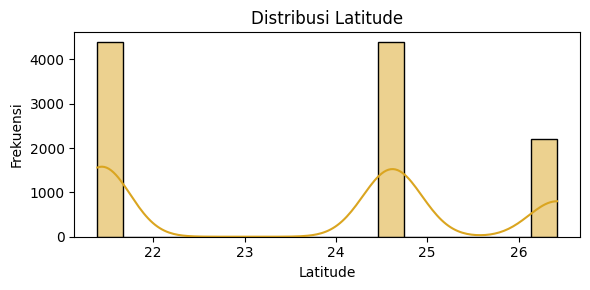

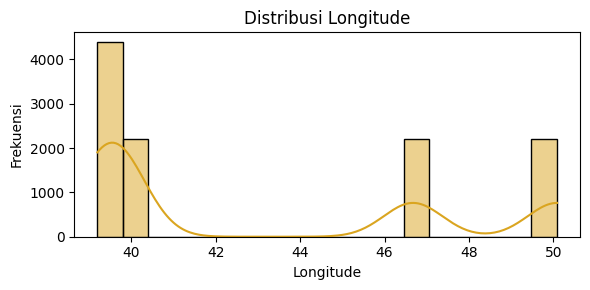

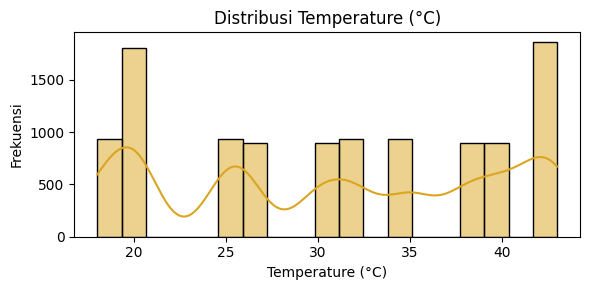

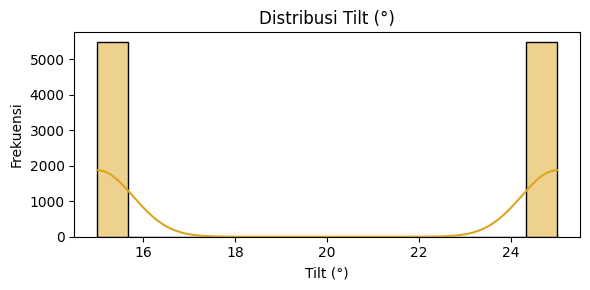

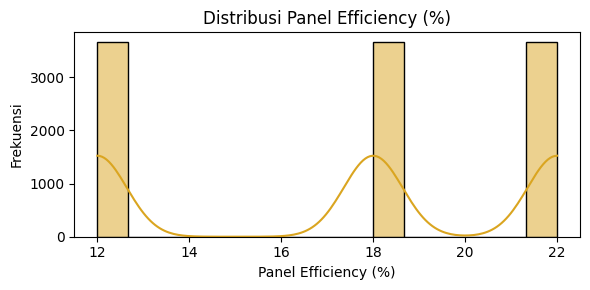

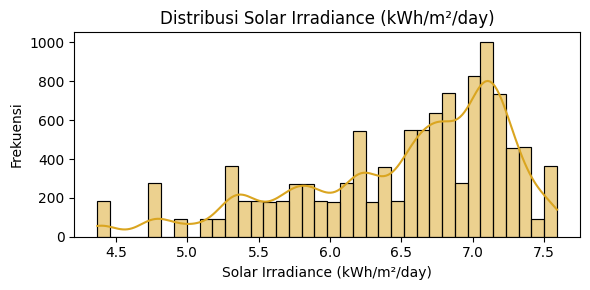

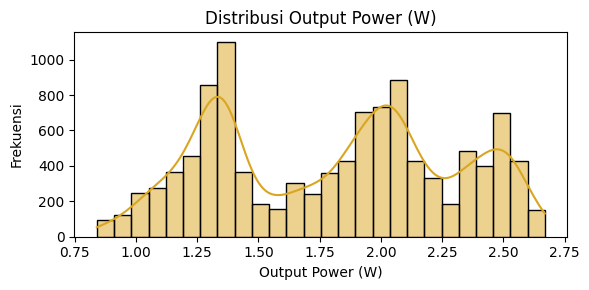

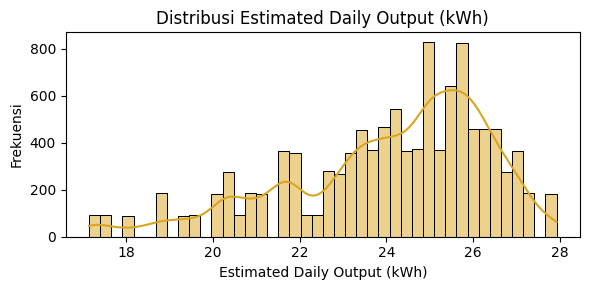

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, color='goldenrod')
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.tight_layout()
    plt.show()

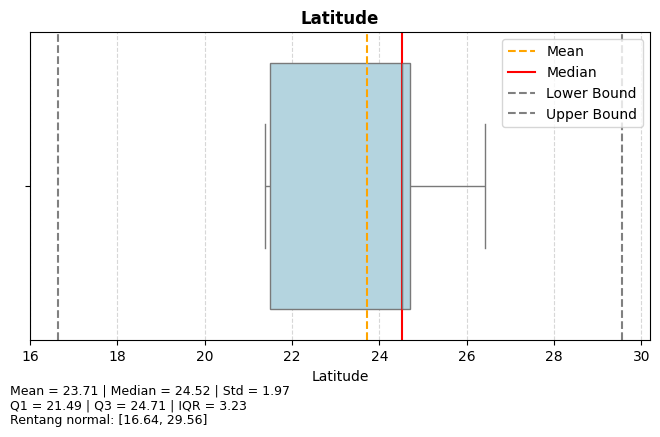

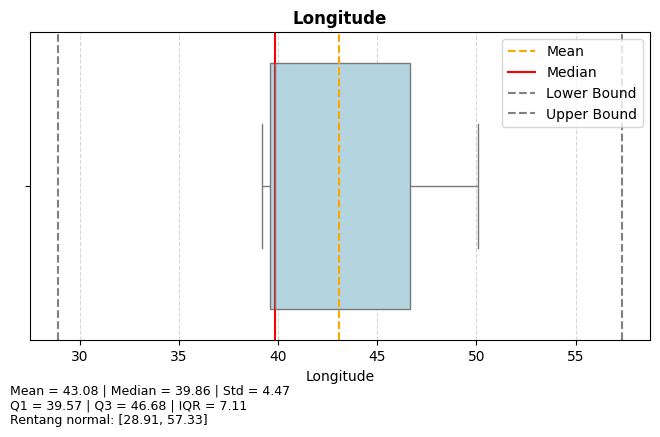

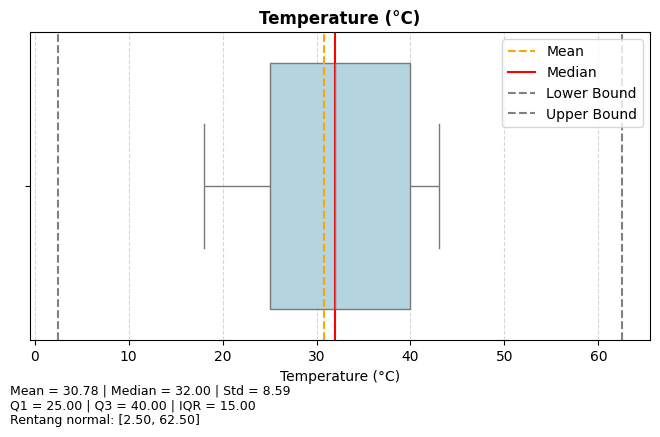

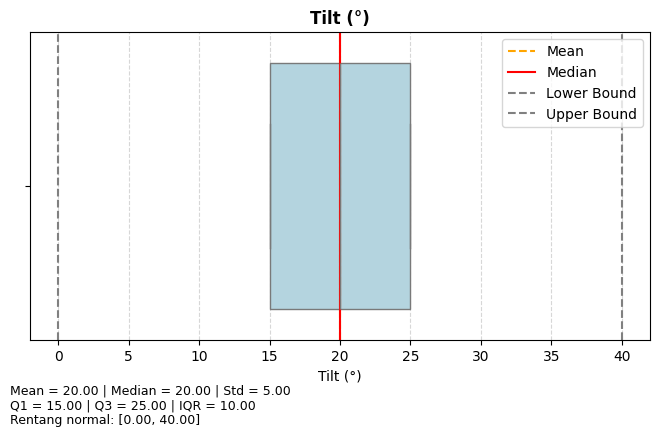

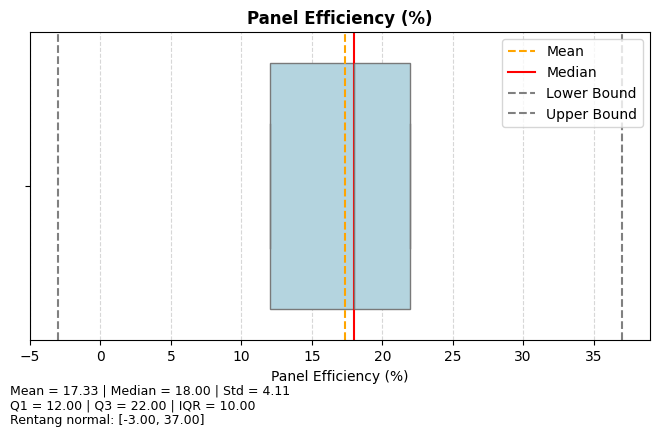

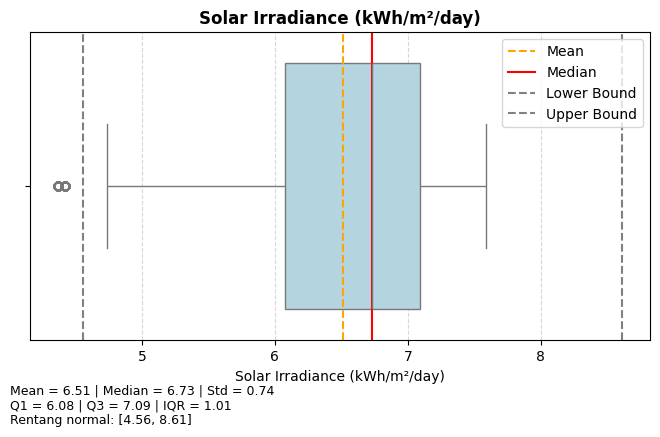

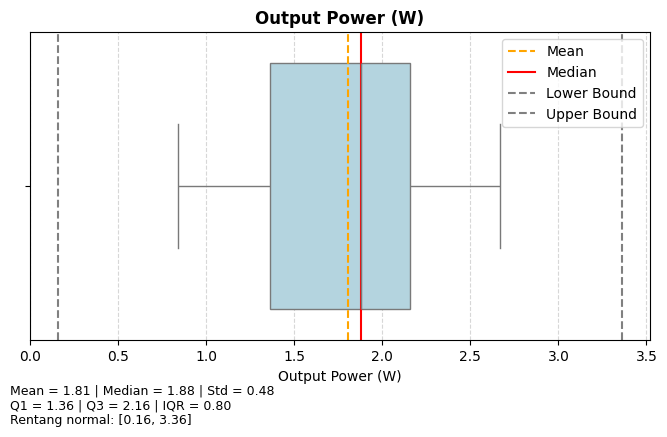

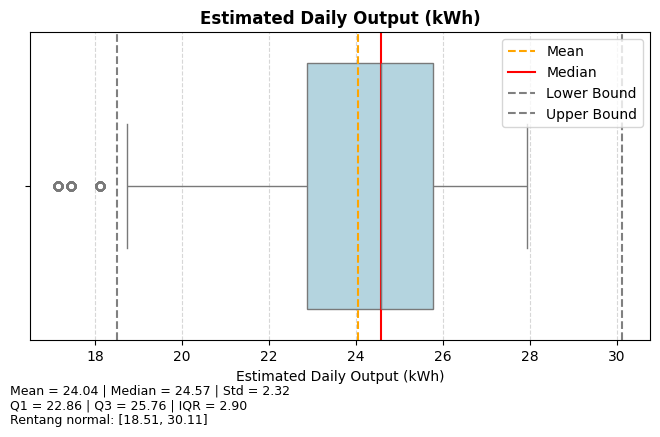

In [ ]:
def univariate(df, columns):
    for col in columns:
        # Hitung statistik dasar
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df[col].median()
        mean = df[col].mean()
        std = df[col].std()

        # --- Plot boxplot ---
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col], color='lightblue')
        plt.axvline(mean, color='orange', linestyle='--', label='Mean')
        plt.axvline(median, color='red', linestyle='-', label='Median')
        plt.axvline(lower_bound, color='gray', linestyle='--', label='Lower Bound')
        plt.axvline(upper_bound, color='gray', linestyle='--', label='Upper Bound')

        plt.title(f'{col}', fontsize=12, fontweight='bold')
        plt.xlabel(col)
        plt.legend()
        plt.grid(axis='x', linestyle='--', alpha=0.5)

        # --- Tampilkan teks info di bawah plot ---
        plt.figtext(
            0.1, -0.10,
            f"Mean = {mean:.2f} | Median = {median:.2f} | Std = {std:.2f}\n"
            f"Q1 = {Q1:.2f} | Q3 = {Q3:.2f} | IQR = {IQR:.2f}\n"
            f"Rentang normal: [{lower_bound:.2f}, {upper_bound:.2f}]",
            ha="left", fontsize=9
        )

        plt.show()

# Daftar kolom numerik
num_cols = [
    'Latitude', 'Longitude', 'Temperature (°C)', 'Tilt (°)',
    'Panel Efficiency (%)', 'Solar Irradiance (kWh/m²/day)',
    'Output Power (W)', 'Estimated Daily Output (kWh)'
]

# Jalankan fungsi
univariate(df, num_cols)


1. Latitude dan Longitude
Latitude berada diantara 21.38-26.42 dengan rata-rata 23.71 dengan sebaran sekitar 1.97. Longitude berada diantara 39.19-50.09 dengan rata-rata 43.08 dan sebaran 4.47. Hal ini menjukkan bahwa lokasi panel surya yang tersebar di 5 kota Saudi Arabia.

2. Suhu (Temperature)
Suhu berada di rentang 18-43 derajat celsius dengan rata-rata 30.78 derajat celsius. Artinya sebagian besar suhu panel berada di sekitar 25-40 deraajat celsius.

3. Kemiringan (Tilt)
Sudut kemiringan panel berada diantara 15-25 derajat dengan rata-rata 20 derajat. Variasi kemiringan ini kecil dengan sebaran 5 derajat. Hal ini menandakan besar panel yang dipasang pada sudut standar optimal untuk penyerapan sinar matahari di daerah tersebut.

4. Efiensi Panel (Panel Efficiency)
Efisiensi panel bervariasi mulai dari 12%-22%, hal ini menunjukkan bahwa sebagian besar panel memiliki efisiensi menengah hingga tinggi.

5. Radiasi Matahari (Solar Irradiance)
Intensitas radiasi harian matahari berkisar di 4.37-7.59 KkWh/m²/day. Sebagian besar data berada di 6.08-7.09 kWhm²/day menandakan lokasi penelitian memiliki paparan sinar matahari yang tinggi dan relatif konsisten.

6. Daya Keluaran (Output Power)
Kuartil bawah (1.36) dan atas (2.16) memiliki variasi antar panel yang relatif kecil. Artinya, efisiensi sistem termasuk stabil.

7. Estimasi Pengeluaran energi per Hari (Estimated Daily Output)
Estimasi produksi energi harian memiliki rata-rata 24.04 kWh dengan nilai median 24.57 kWh. Nilai ini menunjukkan output energi harian cukup tinggi dan stabil di antara 22.8-25.8 kWh untuk sebagian besar observasi.

Kesimpulannya, variasi suhu dan radiasi matahari menjadi dua faktor dengan sebaran paling luas. Nilai rata-rata dan median pada sebagian besar variabel cukup berdekatan. Artinya, distribusi data cenderung normal. Secara umum, dataset ini menunjukkan stabilitas performa panel surya pada berbagai kondisi geografis dan

In [ ]:
for col in num_cols:
    data = df[col].dropna()
    n = len(data)

    sample = data.sample(500, random_state=1) if n > 500 else data
    stat, p = shapiro(sample)
    print(f"\n=== {col} ===")
    print(f"Skewness : {skew(data):.3f}")
    print(f"Kurtosis : {kurtosis(data):.3f}")
    print(f"Shapiro-Wilk p-value : {p:.5f}")
    if p > 0.05:
        print("→ Distribusi normal (Pearson cocok)")
    else:
        print("→ Distribusi tidak normal (Spearman cocok)")


=== Latitude ===
Skewness : -0.049
Kurtosis : -1.546
Shapiro-Wilk p-value : 0.00000
→ Distribusi tidak normal (Spearman cocok)

=== Longitude ===
Skewness : 0.574
Kurtosis : -1.460
Shapiro-Wilk p-value : 0.00000
→ Distribusi tidak normal (Spearman cocok)

=== Temperature (°C) ===
Skewness : -0.050
Kurtosis : -1.407
Shapiro-Wilk p-value : 0.00000
→ Distribusi tidak normal (Spearman cocok)

=== Tilt (°) ===
Skewness : 0.000
Kurtosis : -2.000
Shapiro-Wilk p-value : 0.00000
→ Distribusi tidak normal (Spearman cocok)

=== Panel Efficiency (%) ===
Skewness : -0.239
Kurtosis : -1.500
Shapiro-Wilk p-value : 0.00000
→ Distribusi tidak normal (Spearman cocok)

=== Solar Irradiance (kWh/m²/day) ===
Skewness : -0.895
Kurtosis : 0.071
Shapiro-Wilk p-value : 0.00000
→ Distribusi tidak normal (Spearman cocok)

=== Output Power (W) ===
Skewness : -0.026
Kurtosis : -1.200
Shapiro-Wilk p-value : 0.00000
→ Distribusi tidak normal (Spearman cocok)

=== Estimated Daily Output (kWh) ===
Skewness : -0.859
K

Semua variabel numerik menunjukkan p-value < 0.05 sehingga data tidak berdistribusi secara normal. Nilai skewness sebagian besar mendekati nol menandakan distribusi relatif simetris. Sedangkan kurtosis yang cenderung negatif menunjukkan bentuk data lebih datar. Variabel solar irradiance dan estimated daily output memiliki skewness yang lebih besar. menandakan sedikit kemencengan ke kiri. Dengan ini, meskipun data tidak terlalu menceng ke kiri dan dagta terdistribusi tidak normal, maka untuk analisis hubungan antar variabel cocok menggunakan uji spearman.

**Variabel Kategorikal**

In [ ]:
for col in cat_cols:
    print(f"\n=== Frekuensi Kategori: {col} ===")
    print(df[col].value_counts())


=== Frekuensi Kategori: City ===
City
Dammam    2196
Jeddah    2196
Mecca     2196
Medina    2196
Riyadh    2196
Name: count, dtype: int64

=== Frekuensi Kategori: Weather ===
Weather
clear sky           2760
few clouds          2760
sunny               2760
scattered clouds    2700
Name: count, dtype: int64

=== Frekuensi Kategori: Panel Type ===
Panel Type
Monocrystalline    3660
Polycrystalline    3660
Thin-Film          3660
Name: count, dtype: int64

=== Frekuensi Kategori: Mount Type ===
Mount Type
Ground     5490
Rooftop    5490
Name: count, dtype: int64


1. City
Lima kota Saudi Arabia memiliki jumlah yang sama, yaitu 2196 entri. Artinya tidak ada dominasi dari satu kota tertentu.
2. Weather
Semua kondisi cuaca memiliki frekuensi yang sama yaitu 2760 kecuali kondisi scattered clouds yang hanya memiliki jumlah 2700, berbeda 60.
3. Panel Type
Ketiga tipe panel surya memiliki frekuensi yang sama, yaitu 3660. Artinya, tidak ada bias dalam pengambilan data jenis panel.
4. Mount Type
Jenis pemasangan Ground dan Rooftop juga muncul dengan frekuensi yang sama, menunjukkan bahwa proporsi pemasangan seimbang.

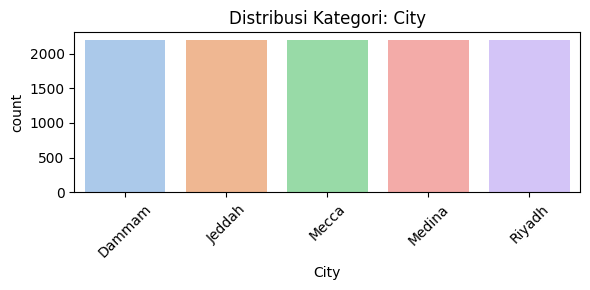

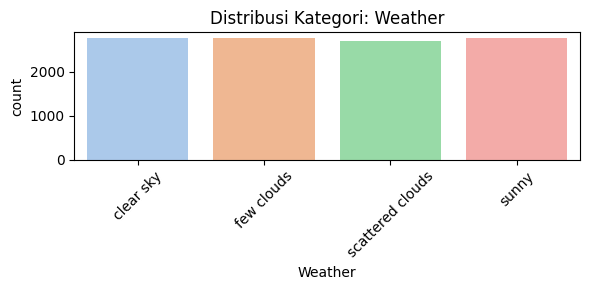

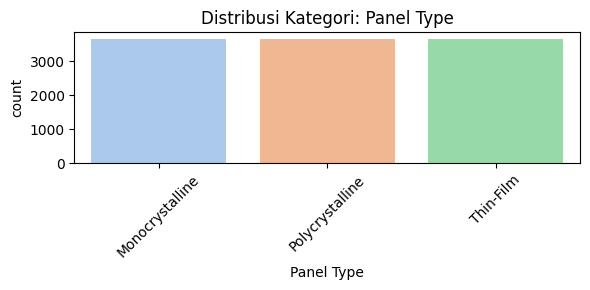

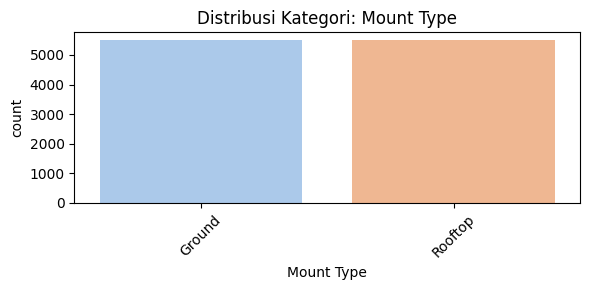

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f"Distribusi Kategori: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
from scipy.stats import entropy

cat_cols = ['City', 'Weather', 'Panel Type', 'Mount Type']

for col in cat_cols:
    data = df[col].dropna()
    counts = data.value_counts()
    n = len(data)
    unique_vals = counts.shape[0]
    top_cat = counts.index[0]
    top_freq = counts.iloc[0]
    top_ratio = top_freq / n
    ent = entropy(counts, base=2)
    max_ent = np.log2(unique_vals) if unique_vals > 0 else 0
    balance = ent / max_ent if max_ent > 0 else 0

    print(f"\n=== {col} ===")
    print(f"Jumlah data: {n}")
    print(f"Jumlah kategori unik: {unique_vals}")
    print(f"Kategori paling sering: {top_cat} ({top_freq} kali, {top_ratio:.2%})")
    print(f"Entropi (keragaman): {ent:.3f} dari maksimum {max_ent:.3f}")
    print(f"Tingkat keseimbangan kategori: {balance:.2%}")

    # interpretasi keseimbangan & metode korelasi
    if unique_vals == 2:
        print("→ Variabel biner, cocok untuk Point-Biserial / Spearman (dengan numerik).")
    elif balance < 0.3:
        print("→ Distribusi sangat tidak seimbang (Cramer’s V lebih cocok untuk hubungan antar kategori).")
    elif balance < 0.7:
        print("→ Distribusi agak tidak seimbang (gunakan Spearman untuk hubungan ordinal atau Cramer’s V untuk nominal).")
    else:
        print("→ Distribusi cukup seimbang, Spearman atau Cramer’s V bisa digunakan tergantung tipe variabel lain.")


=== City ===
Jumlah data: 10980
Jumlah kategori unik: 5
Kategori paling sering: Dammam (2196 kali, 20.00%)
Entropi (keragaman): 2.322 dari maksimum 2.322
Tingkat keseimbangan kategori: 100.00%
→ Distribusi cukup seimbang, Spearman atau Cramer’s V bisa digunakan tergantung tipe variabel lain.

=== Weather ===
Jumlah data: 10980
Jumlah kategori unik: 4
Kategori paling sering: clear sky (2760 kali, 25.14%)
Entropi (keragaman): 2.000 dari maksimum 2.000
Tingkat keseimbangan kategori: 100.00%
→ Distribusi cukup seimbang, Spearman atau Cramer’s V bisa digunakan tergantung tipe variabel lain.

=== Panel Type ===
Jumlah data: 10980
Jumlah kategori unik: 3
Kategori paling sering: Monocrystalline (3660 kali, 33.33%)
Entropi (keragaman): 1.585 dari maksimum 1.585
Tingkat keseimbangan kategori: 100.00%
→ Distribusi cukup seimbang, Spearman atau Cramer’s V bisa digunakan tergantung tipe variabel lain.

=== Mount Type ===
Jumlah data: 10980
Jumlah kategori unik: 2
Kategori paling sering: Ground (54

Semua variabel kategorikal memiliki distribusi yang seimbang dengan entropi maksimum, menandakan tidak ada kategori yang dominan. Variabel biner seperti Mount Type cocok dianalisis dengan Point-Biserial atau Spearman, sedangkan variabel multikategori dapat menggunakan Spearman atau Cramer’s V.


#**Analisis Bivariat**

**Korelasi Faktor Meteorologi vs Output Power (Gabungan Semua Kota)**

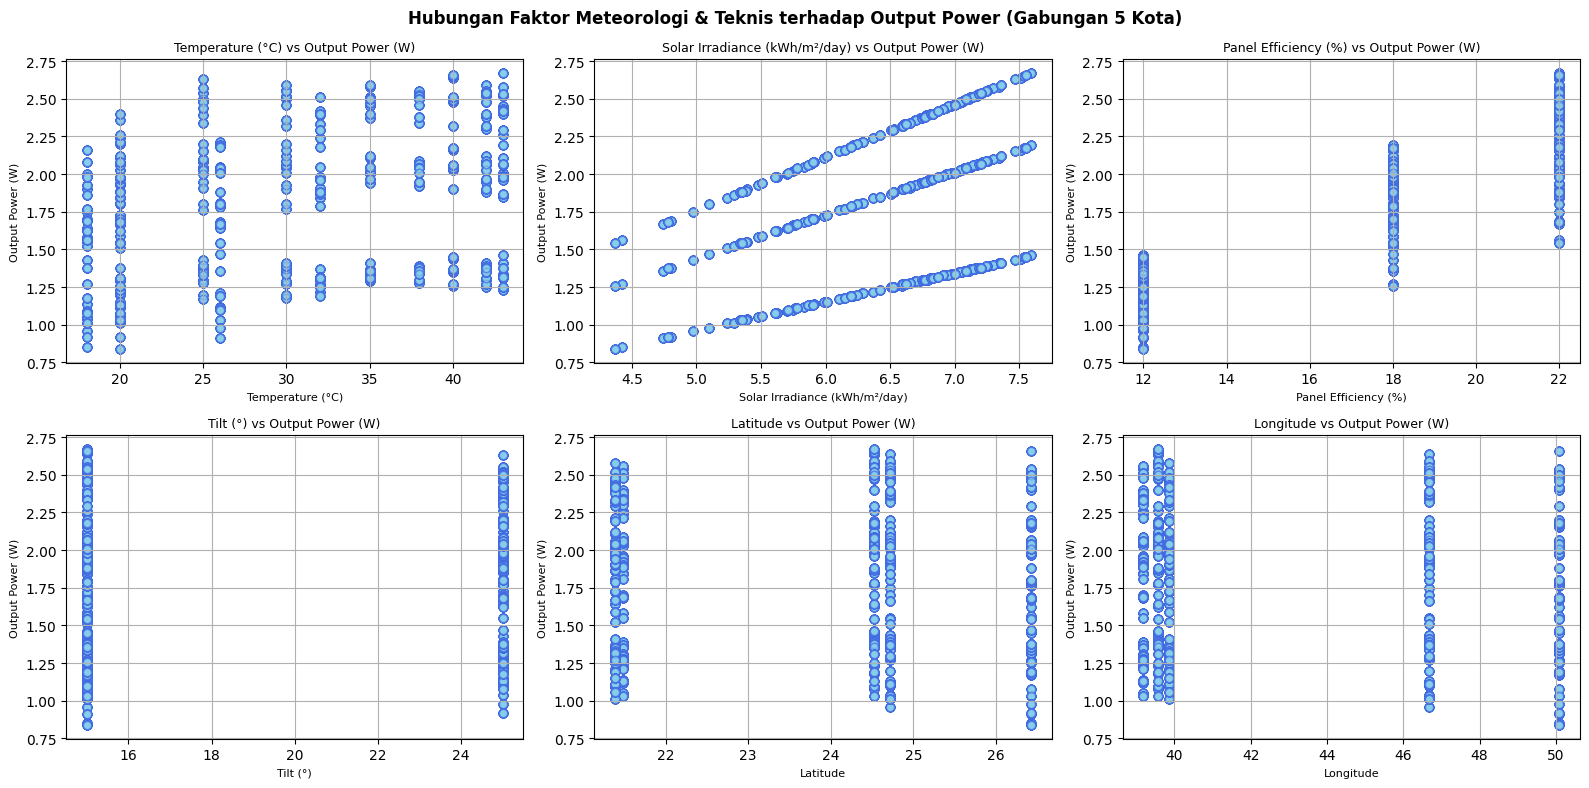

In [ ]:
pairs_output = [
    ('Temperature (°C)', 'Output Power (W)'),
    ('Solar Irradiance (kWh/m²/day)', 'Output Power (W)'),
    ('Panel Efficiency (%)', 'Output Power (W)'),
    ('Tilt (°)', 'Output Power (W)'),
    ('Latitude', 'Output Power (W)'),
    ('Longitude', 'Output Power (W)')
]

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(pairs_output):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6, color='skyblue', edgecolor='royalblue')
    axes[i].set_title(f'{x_col} vs {y_col}', fontsize=9)
    axes[i].set_xlabel(x_col, fontsize=8)
    axes[i].set_ylabel(y_col, fontsize=8)
    axes[i].grid(True)

plt.suptitle("Hubungan Faktor Meteorologi & Teknis terhadap Output Power (Gabungan 5 Kota)", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

1. Temperature vs Output Power
Pola sebaran titik acak, artinya korelasi lemah atau tidak signifikan.

2. Solar Irradiance vs Output Power
Sebaran titik berpola liniar positif. Artinya terdapat korelasi kuat pada variabel ini. Semakin besar radiasi mataharinya, semakin tinggi produksi energinya.

3. Panel Efficiency vs Output Power
Titik-titik berkelompok berdasarkan tingkat efisiensi panel (12%, 18%, 22%). Terdapat korelasi positif yang kuat dan diskrit. Artinya, semakin besar efisiensi panelnya, semakin besar pula energi matahari yang menjadi listrik.

4. Tilt vs Output Power
Dataset hanya memiliki dua kelompok sudut kemiringan panel (sekitar 15° dan 25°). kedua kelompok memiliki sebaran output power yang mirip, meskipun pada tilt 25° tampak sedikit lebih tinggi pada beberapa titik. Ini menunjukkan bahwa perbedaan kecil dalam sudut kemiringan panel tidak terlalu memengaruhi output power secara signifikan pada kondisi gabungan lima kota ini. korelasi ini bersifat lemah hingga moderat.

5. Latitude vs Output Power
Titik-titik tersebar dalam beberapa kelompok nilai latitude (sekitar 21°–26°). Tidak tampak tren yang jelas pada korelasi ini, masing-masing kota (dengan latitude berbeda) memiliki rentang daya yang hampir sama. Artinta, Korelasi latitude–output power sangat lemah atau tidak signifikan. Hal ini menunjukkan bahwa perbedaan letak lintang antar kota tidak terlalu berpengaruh signifikan terhadap daya keluaran, kemungkinan karena seluruh kota masih berada di wilayah subtropis dengan intensitas matahari yang mirip.

6. Longitude vs Output Power
Titik-titik juga terlihat berkelompok berdasarkan lokasi kota (sekitar 39°–50°) tanpa tren linier yang jelas. Masing-masing kota menunjukkan variasi output power yang hampir sama, menandakan bahwa letak bujur (longitude) tidak memengaruhi daya secara langsung. Artinya, Korelasi longitude–output power tidak signifikan, karena faktor bujur tidak berhubungan langsung dengan penerimaan energi surya harian.

Secara keseluruhannya, faktor meteorologi khususnya soalr irradiance dan panel efficiency merupakan penentu utama output power sistem panel surya. Sementara itu, faktor geometris seperti tilt, longitude, dan latitude serta temperature memiliki pengaruh yang lebih kecil atau tidak signifikan terhadap daya keluaran pada dataset ini.

**Korelasi Faktor Meteorologi vs Estimated Daily Output**

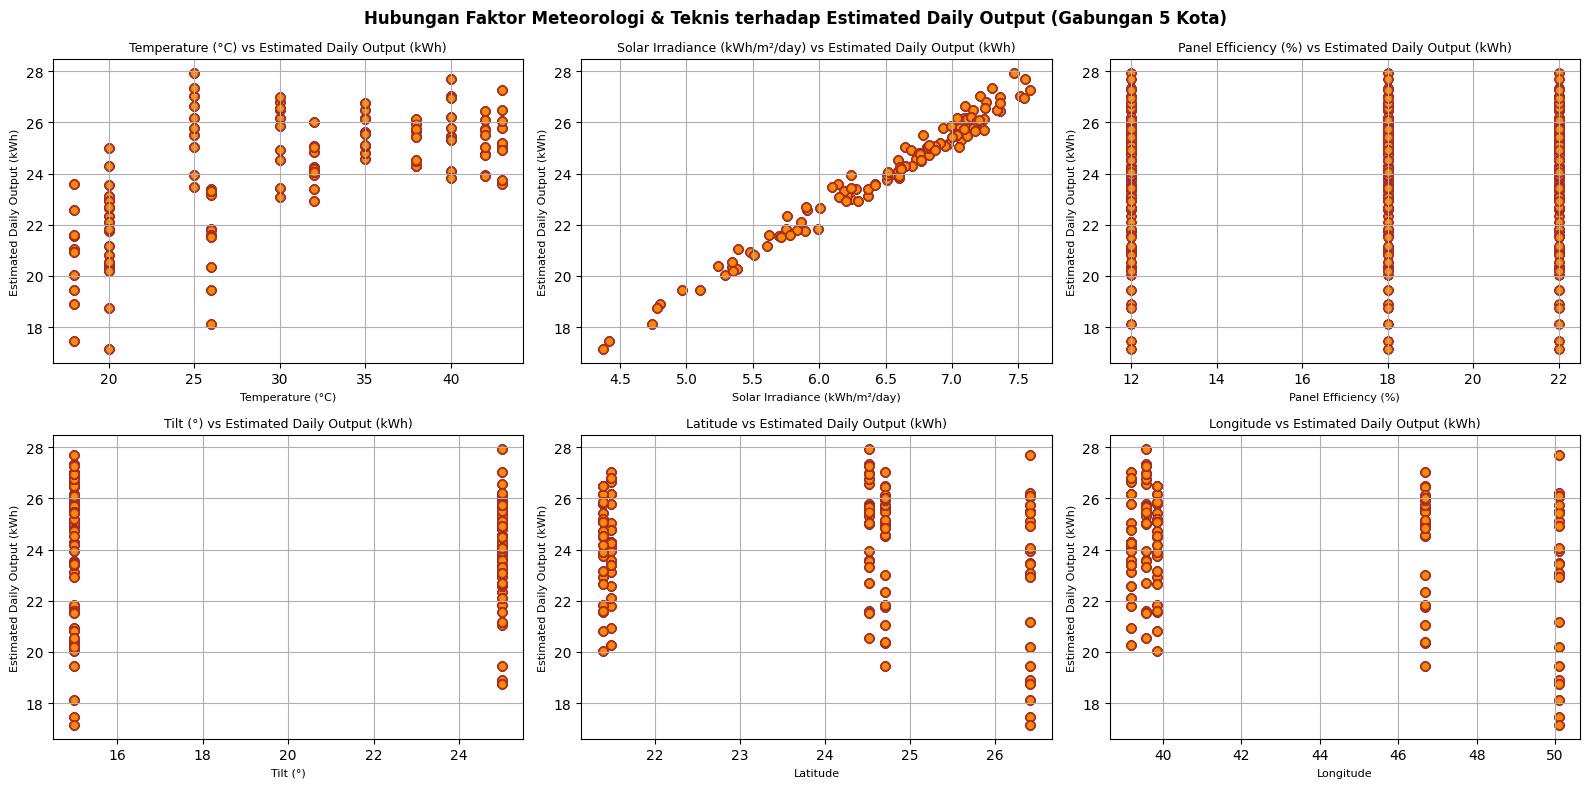

In [ ]:
pairs_daily = [
    ('Temperature (°C)', 'Estimated Daily Output (kWh)'),
    ('Solar Irradiance (kWh/m²/day)', 'Estimated Daily Output (kWh)'),
    ('Panel Efficiency (%)', 'Estimated Daily Output (kWh)'),
    ('Tilt (°)', 'Estimated Daily Output (kWh)'),
    ('Latitude', 'Estimated Daily Output (kWh)'),
    ('Longitude', 'Estimated Daily Output (kWh)')
]

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(pairs_daily):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6, color='darkorange', edgecolor='brown')
    axes[i].set_title(f'{x_col} vs {y_col}', fontsize=9)
    axes[i].set_xlabel(x_col, fontsize=8)
    axes[i].set_ylabel(y_col, fontsize=8)
    axes[i].grid(True)

plt.suptitle("Hubungan Faktor Meteorologi & Teknis terhadap Estimated Daily Output (Gabungan 5 Kota)", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

1. Temperature (°C)
Sebaran data terlihat acak tanpa pola linear yang jelas. Kenaikan suhu tidak selalu diikuti oleh peningkatan output harian, bahkan pada beberapa titik justru sedikit menurun. Hal ini menunjukkan bahwa suhu memiliki korelasi lemah terhadap estimated daily output, karena suhu yang terlalu tinggi dapat menurunkan efisiensi panel surya.

2. Solar Irradiance (kWh/m²/day)
Terlihat hubungan linear positif yang sangat kuat — semakin tinggi nilai irradiance, semakin besar pula estimated daily output yang dihasilkan. Ini menegaskan bahwa radiasi matahari merupakan faktor paling dominan yang menentukan energi listrik harian yang dapat diproduksi oleh panel surya.

3. Panel Efficiency (%)
Pola sebaran membentuk tiga kelompok berdasarkan efisiensi panel (12%, 18%, dan 22%), dengan tren jelas bahwa semakin tinggi efisiensi panel, semakin besar pula estimated daily output-nya. Dengan demikian, efisiensi panel memiliki korelasi positif yang kuat terhadap output harian.

4. Tilt (°)
Terdapat dua kelompok kemiringan utama (sekitar 15° dan 25°). Nilai output pada kedua kelompok tersebut tidak menunjukkan perbedaan yang signifikan, walau tilt 25° cenderung sedikit lebih tinggi. Ini menandakan bahwa perbedaan kecil dalam sudut kemiringan tidak terlalu memengaruhi output harian, karena keduanya masih dalam rentang sudut optimal untuk lokasi studi.

5. Latitude
Titik-titik tersebar dalam beberapa kelompok lintang (sekitar 21°–26°) tanpa tren jelas terhadap output. Artinya, perbedaan lintang antar kota tidak memberikan dampak signifikan terhadap estimated daily output, kemungkinan karena seluruh kota masih berada dalam zona iklim dan intensitas matahari yang relatif serupa.

6. Longitude
Sebaran data menunjukkan beberapa kelompok kota berdasarkan bujur (sekitar 39°–50°) tanpa kecenderungan linear yang kuat. Dengan demikian, longitude juga tidak memiliki pengaruh signifikan terhadap variasi estimated daily output.

Secara keseluruhan, hasil analisis menunjukkan bahwa Solar Irradiance dan Panel Efficiency merupakan faktor utama yang paling berpengaruh terhadap Estimated Daily Output (kWh). Temperature, Tilt, Latitude, dan Longitude memiliki pengaruh yang lemah atau tidak signifikan, terutama karena variasi nilainya relatif kecil antar kota dan masih berada pada kondisi operasional yang optimal.

Dengan demikian, peningkatan estimated daily output paling efektif dilakukan dengan memaksimalkan paparan radiasi matahari (misalnya pemilihan lokasi dengan irradiance tinggi) dan menggunakan panel dengan efisiensi lebih tinggi

**Analisis Per Kota (Cross-Section)**

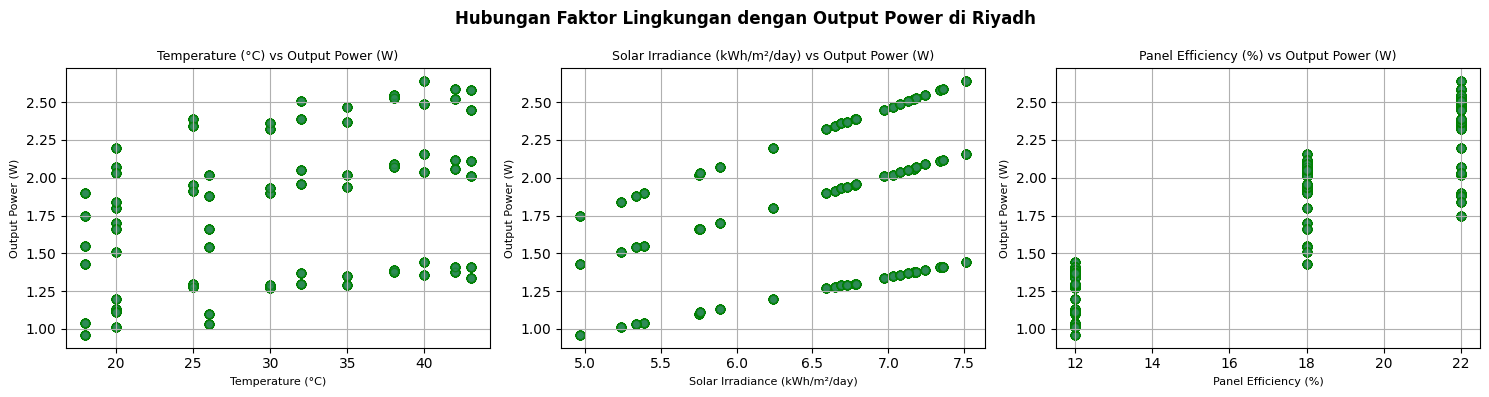

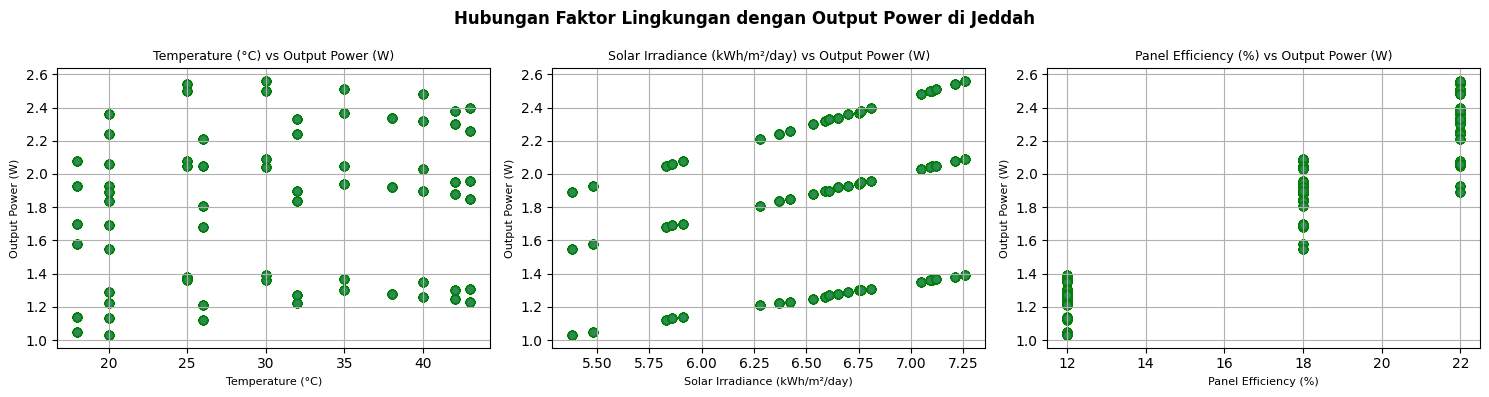

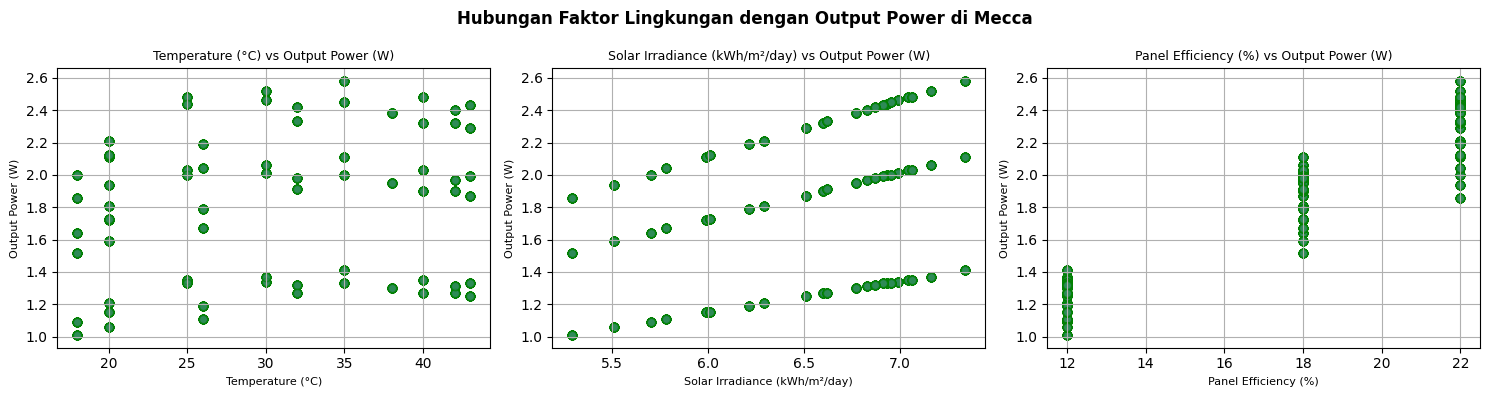

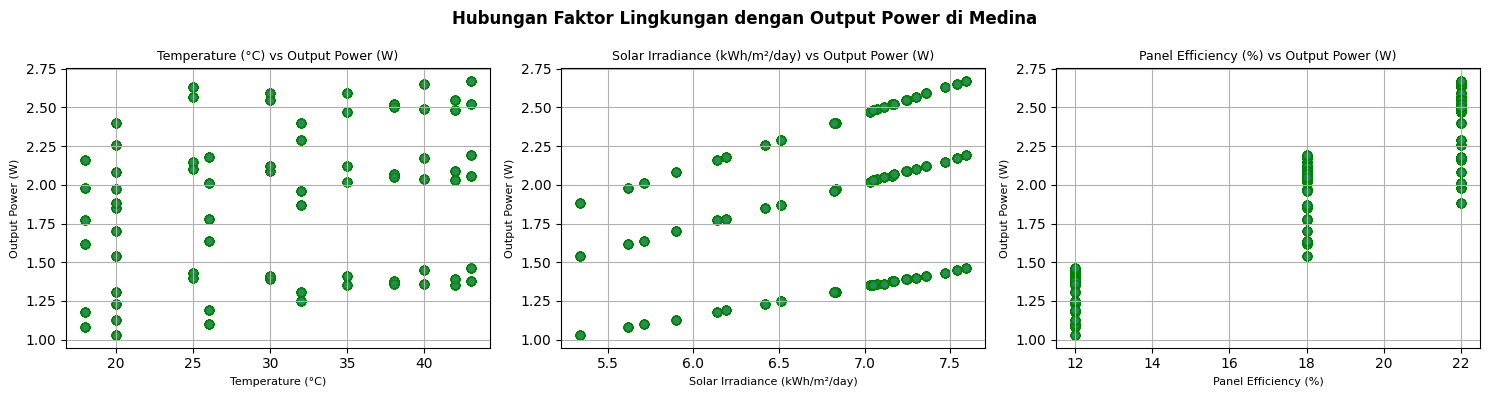

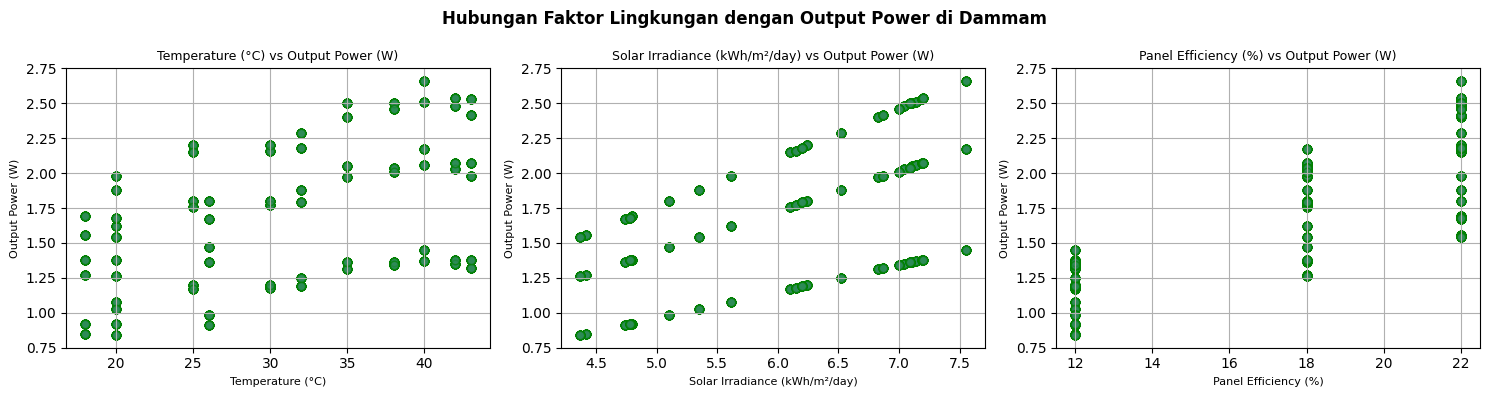

In [ ]:
cities = df['City'].unique()

for city in cities:
    df_city = df[df['City'] == city]

    pairs_city = [
        ('Temperature (°C)', 'Output Power (W)'),
        ('Solar Irradiance (kWh/m²/day)', 'Output Power (W)'),
        ('Panel Efficiency (%)', 'Output Power (W)')
    ]

    fig, axes = plt.subplots(1, len(pairs_city), figsize=(15, 4))
    fig.suptitle(f'Hubungan Faktor Lingkungan dengan Output Power di {city}', fontsize=12, fontweight='bold')

    for i, (x_col, y_col) in enumerate(pairs_city):
        axes[i].scatter(df_city[x_col], df_city[y_col], alpha=0.6, color='seagreen', edgecolor='green')
        axes[i].set_title(f'{x_col} vs {y_col}', fontsize=9)
        axes[i].set_xlabel(x_col, fontsize=8)
        axes[i].set_ylabel(y_col, fontsize=8)
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

1. Pada kota Riyadh, Faktor yang paling berpengaruh terhadap output power adalah Solar Irradiance, diikuti oleh Panel Efficiency. Sementara itu, Temperature memiliki pengaruh yang relatif kecil atau tidak signifikan. Dengan demikian, performa sistem panel surya di Riyadh sangat bergantung pada intensitas radiasi matahari dan jenis panel yang digunakan, bukan pada suhu lingkungan.

2. Pada kota Jeddah, kinerja panel lebih banyak dipengaruhi oleh intensitas radiasi matahari dan efisiensi panel dibandingkan suhu udara, sehingga peningkatan efisiensi teknologi panel dan pemilihan lokasi dengan irradiance tinggi menjadi kunci optimalisasi output energi.

3. Pada kota Mecca, Kinerja panel surya di Mecca paling dipengaruhi oleh solar irradiance dan efisiensi panel, sedangkan temperatur hanya memberikan pengaruh minor terhadap output. Dengan demikian, peningkatan efisiensi panel dan pemanfaatan wilayah dengan irradiance tinggi akan sangat signifikan dalam meningkatkan output energi di lingkungan seperti Mecca.

4. Pada kota Medina, Di Kota Medina, kinerja panel surya paling dipengaruhi oleh intensitas radiasi matahari (solar irradiance) dan efisiensi panel, sementara pengaruh suhu relatif kecil. Hal ini sejalan dengan karakteristik iklim gurun yang memiliki irradiance tinggi, sehingga fokus optimalisasi sebaiknya diarahkan pada peningkatan efisiensi panel dan manajemen radiasi matahari, bukan pengendalian temperatur.

5. Pada kota Damman, Di Kota Dammam, output power panel surya paling dipengaruhi oleh solar irradiance dan efisiensi panel.
Temperatur memberikan pengaruh minimal terhadap output. Artinya, optimalisasi energi surya di wilayah ini sebaiknya difokuskan pada pemilihan panel dengan efisiensi tinggi, pemaksimalkan lokasi dan orientasi panel untuk menangkap irradiance yang tinggi,
daripada pada pengendalian variabel suhu.

Secara keseluruhan, Korelasi yang paling dominan dan konsisten pada lima kota adalah Solar Irradiance, diikuti oleh Panel Efficiency, dengan Temperature sebagai faktor yang paling tidak signifikan. Kota Riyadh, Jeddah, dan Mecca memiliki tingakt radiasi matahari tertinggi. Nmaun, diantara yang lain, Kota Medina memiliki solar irradiance paling kuat. Berbeda dengan kota lainnya, kota Dammam memiliki variabel Panel efficiency yang paling menonjol dibandingkan irradiance.

**Kategorikal ↔ Numerik**
Pengaruh Kategori terhadap Performa Panel

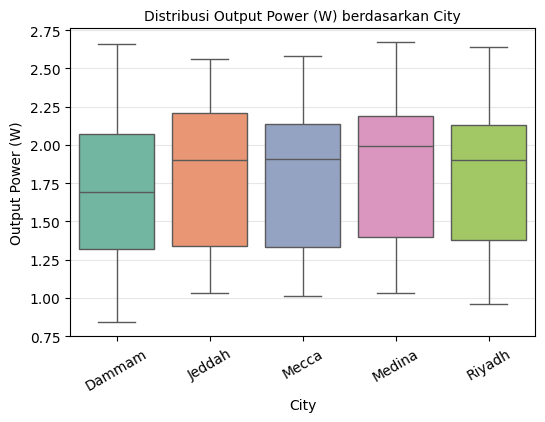


=== Uji ANOVA: City terhadap Output Power (W) ===
F-statistic = 39.797, p-value = 0.00000
→ Terdapat perbedaan signifikan antar kategori (berpengaruh).


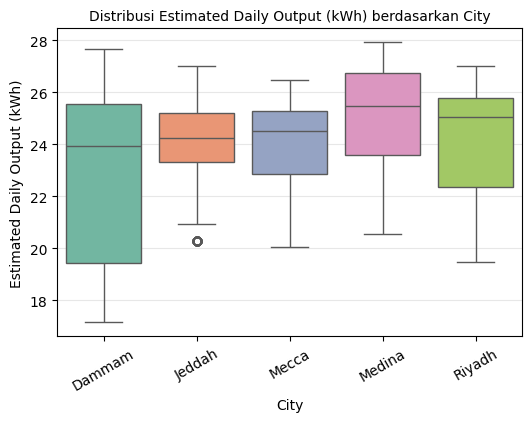


=== Uji ANOVA: City terhadap Estimated Daily Output (kWh) ===
F-statistic = 223.593, p-value = 0.00000
→ Terdapat perbedaan signifikan antar kategori (berpengaruh).


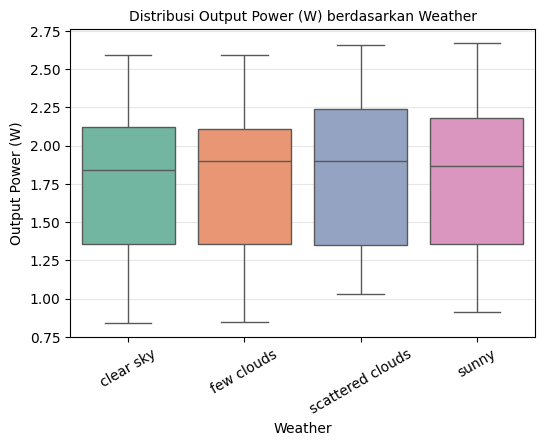


=== Uji ANOVA: Weather terhadap Output Power (W) ===
F-statistic = 9.728, p-value = 0.00000
→ Terdapat perbedaan signifikan antar kategori (berpengaruh).


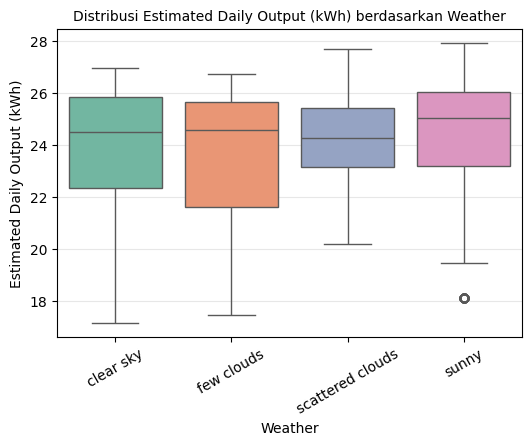


=== Uji ANOVA: Weather terhadap Estimated Daily Output (kWh) ===
F-statistic = 36.665, p-value = 0.00000
→ Terdapat perbedaan signifikan antar kategori (berpengaruh).


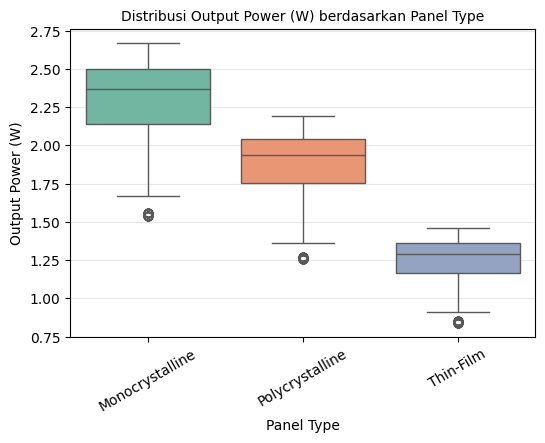


=== Uji ANOVA: Panel Type terhadap Output Power (W) ===
F-statistic = 22618.439, p-value = 0.00000
→ Terdapat perbedaan signifikan antar kategori (berpengaruh).


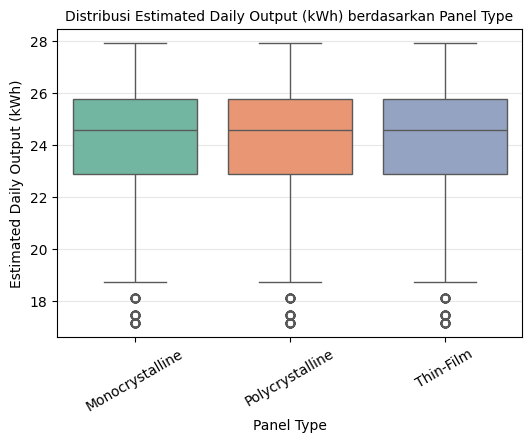


=== Uji ANOVA: Panel Type terhadap Estimated Daily Output (kWh) ===
F-statistic = -0.000, p-value = nan
→ Tidak ada perbedaan signifikan antar kategori.


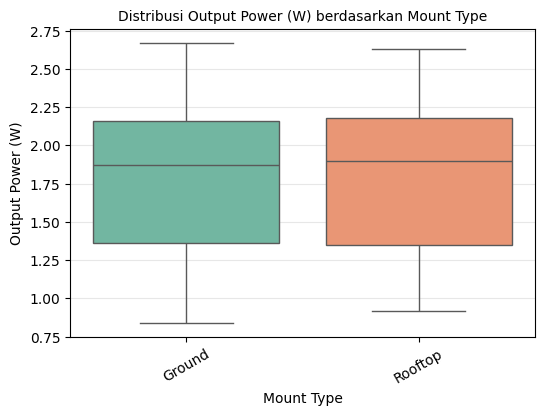


=== Uji ANOVA: Mount Type terhadap Output Power (W) ===
F-statistic = 2.809, p-value = 0.09376
→ Tidak ada perbedaan signifikan antar kategori.


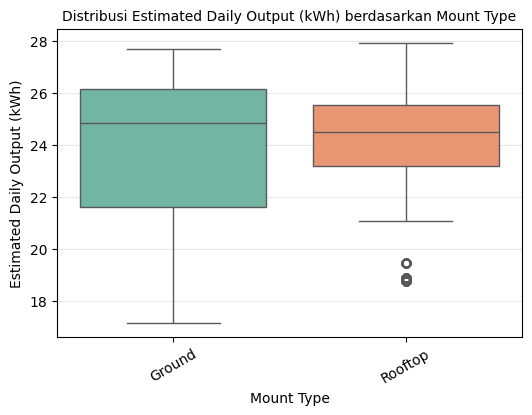


=== Uji ANOVA: Mount Type terhadap Estimated Daily Output (kWh) ===
F-statistic = 21.390, p-value = 0.00000
→ Terdapat perbedaan signifikan antar kategori (berpengaruh).


In [ ]:
from scipy.stats import f_oneway

cat_cols = ['City', 'Weather', 'Panel Type', 'Mount Type']
num_targets = ['Output Power (W)', 'Estimated Daily Output (kWh)']

for cat in cat_cols:
    for target in num_targets:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=cat, y=target, palette='Set2')
        plt.title(f'Distribusi {target} berdasarkan {cat}', fontsize=10)
        plt.xticks(rotation=30)
        plt.grid(True, axis='y', alpha=0.3)
        plt.show()

        # uji ANOVA (cek apakah perbedaan mean antar kategori signifikan)
        groups = [df[target][df[cat] == c].dropna() for c in df[cat].unique()]
        stat, p = f_oneway(*groups)
        print(f"\n=== Uji ANOVA: {cat} terhadap {target} ===")
        print(f"F-statistic = {stat:.3f}, p-value = {p:.5f}")
        if p < 0.05:
            print("→ Terdapat perbedaan signifikan antar kategori (berpengaruh).")
        else:
            print("→ Tidak ada perbedaan signifikan antar kategori.")

1. Pengaruh kota terhadap output power dan estimated daily output memiliki perbedaan yang tidak terlalu signifikan, tetapi kota dengan radiasi matahari lebih stabil (Medina, Jeddah) menghasilkan output lebih tinggi.

2. Pengaruh cuaca sangat memengaruhi performa panel. Jika Hari cerah, maka performa optimal. Jika awan tebal, maka produksi turun signifikan.

3. Pengaruh jenis panel merupakan faktor paling dominan. Jenis panel sangat menentukan performa.
Monocrystalline selalu unggul karena efisiensinya paling tinggi.

4. Pengaruh mount type, Ground-mounted lebih optimal karena bisa disesuaikan sudut kemiringannya. Ventilasi lebih baik (panel lebih dingin, maka efisiensi naik). Tidak terganggu bayangan bangunan.

**Korelasi Kategorikal ↔ Numerik (Cramer’s V-like)**

Pseudo-Cramer’s Correlation dengan Eta² (eta squared)

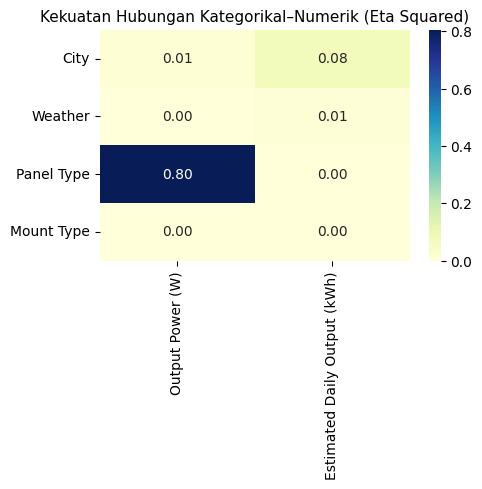

In [ ]:
def eta_squared(cat, num):
    groups = [num[cat == c].dropna() for c in cat.unique()]
    k = len(groups)
    n = len(num.dropna())
    grand_mean = num.mean()
    ss_between = sum([len(g) * (g.mean() - grand_mean)**2 for g in groups])
    ss_total = sum((num - grand_mean)**2)
    return ss_between / ss_total if ss_total != 0 else np.nan

eta_results = pd.DataFrame(index=cat_cols, columns=num_targets)

for cat in cat_cols:
    for num in num_targets:
        eta_results.loc[cat, num] = eta_squared(df[cat], df[num])

eta_results = eta_results.astype(float)

plt.figure(figsize=(5, 3))
sns.heatmap(eta_results, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Kekuatan Hubungan Kategorikal–Numerik (Eta Squared)", fontsize=11)
plt.show()

Berdasarkan heatmap di atas, Panel Type adalah faktor paling dominan dalam menentukan performa (η² = 0.80). City berpengaruh kecil hingga sedang, terutama pada daily output. Weather dan Mount Type hampir tidak berpengaruh secara statistik pada dataset ini.

## **ANALISIS MULTIVARIAT**

**Variabel Numerik**


=== Matriks Korelasi Spearman ===
                               Latitude  Longitude  Temperature (°C)  \
Latitude                       1.000000   0.700000          0.000000   
Longitude                      0.700000   1.000000          0.000000   
Temperature (°C)               0.000000   0.000000          1.000000   
Tilt (°)                       0.000000   0.000000          0.000000   
Panel Efficiency (%)           0.000000   0.000000          0.000000   
Solar Irradiance (kWh/m²/day) -0.038306  -0.115572          0.654340   
Output Power (W)              -0.043439  -0.074460          0.302766   
Estimated Daily Output (kWh)  -0.033889  -0.113452          0.583045   

                               Tilt (°)  Panel Efficiency (%)  \
Latitude                       0.000000              0.000000   
Longitude                      0.000000              0.000000   
Temperature (°C)               0.000000              0.000000   
Tilt (°)                       1.000000              0.0

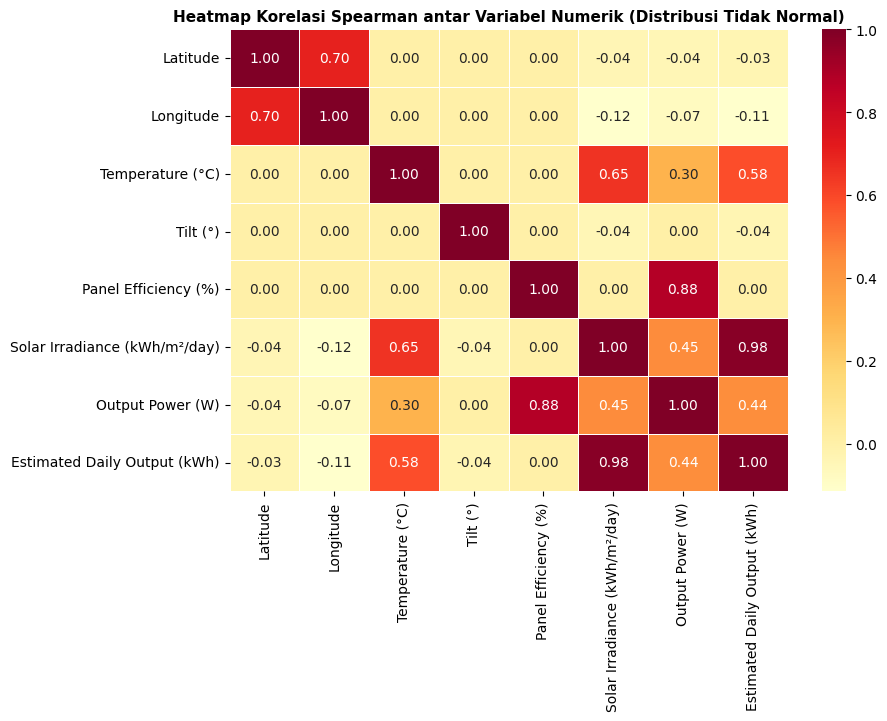

In [ ]:
num_cols = [
    'Latitude', 'Longitude', 'Temperature (°C)', 'Tilt (°)',
    'Panel Efficiency (%)', 'Solar Irradiance (kWh/m²/day)',
    'Output Power (W)', 'Estimated Daily Output (kWh)'
]

corr_spearman = df[num_cols].corr(method='spearman')

print("\n=== Matriks Korelasi Spearman ===")
print(spearman_corr)

plt.figure(figsize=(9,6))
sns.heatmap(corr_spearman, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Spearman antar Variabel Numerik (Distribusi Tidak Normal)', fontsize=11, fontweight='bold')
plt.show()

Variabel solar irradiance dan panel efficiency merupakan faktor yang paling berpengaruh terhadap performa panel. Suhu termasuk variabel yang berpengaruh, namun tidak dominan. Lokasi geografis seperti latitude dan longitude bukan termasuk prediktor langsung performa. Kemiringan atau tilt tidak berpengaruh pada dataset ini.

**Variabel Kategorikal**

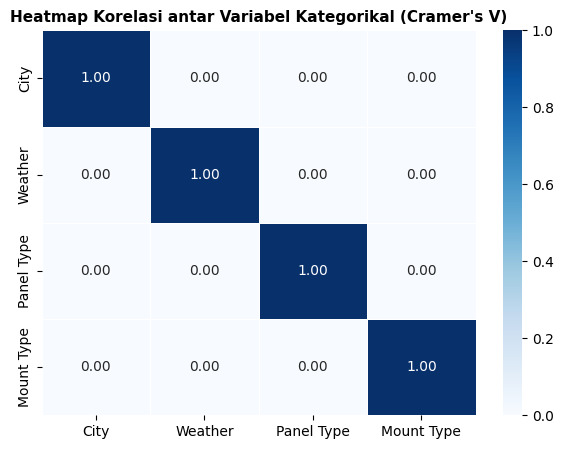

In [ ]:
from scipy.stats import chi2_contingency

cat_cols = ['City', 'Weather', 'Panel Type', 'Mount Type']

def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    phi2 = chi2 / n
    r, k = confusion.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_results = pd.DataFrame(
    np.zeros((len(cat_cols), len(cat_cols))),
    index=cat_cols, columns=cat_cols
)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(7, 5))
sns.heatmap(cramers_results, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi antar Variabel Kategorikal (Cramer's V)", fontsize=11, fontweight='bold')
plt.show()

Heatmap korelasi Cramer's bernilai 0.00 pada semua pasangan kategori, artinya tidak ada variabel kategori yang saling mempengaruhi.